Load the `tidyverse` and the `palmerpenguins` package.

In [1]:
options(repr.plot.res = 300)

# load your libraries in this cell
library(tidyverse)
library(palmerpenguins)


Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



This cell produces a table called `penguins_long` that you'll use to make the chart below.

In [2]:
# uncomment the following lines

penguins_long = penguins %>% pivot_longer(-c(species, island, sex, year)) %>% drop_na()
penguins_long %>% head

species,island,sex,year,name,value
<fct>,<fct>,<fct>,<int>,<chr>,<dbl>
Adelie,Torgersen,male,2007,bill_length_mm,39.1
Adelie,Torgersen,male,2007,bill_depth_mm,18.7
Adelie,Torgersen,male,2007,flipper_length_mm,181.0
Adelie,Torgersen,male,2007,body_mass_g,3750.0
Adelie,Torgersen,female,2007,bill_length_mm,39.5
Adelie,Torgersen,female,2007,bill_depth_mm,17.4


Re-create the following figure.

These functions will come in handy:
- `geom_point`
- `facet_wrap`
- `position_jitter`

This line will add the `median` lines to the chart.

```R
p = p + stat_summary(fun = median, 
                     fun.min = median, 
                     fun.max = median, 
                     geom = "crossbar", 
                     width = 0.75, 
                     size = 0.2,
                     mapping = aes(group = species))
```

This line adjusts the x-axis text.

```R
p = p + theme(axis.text.x = element_text(hjust = 1, angle = 45))
```

<img src="03_assignment_example.png" />

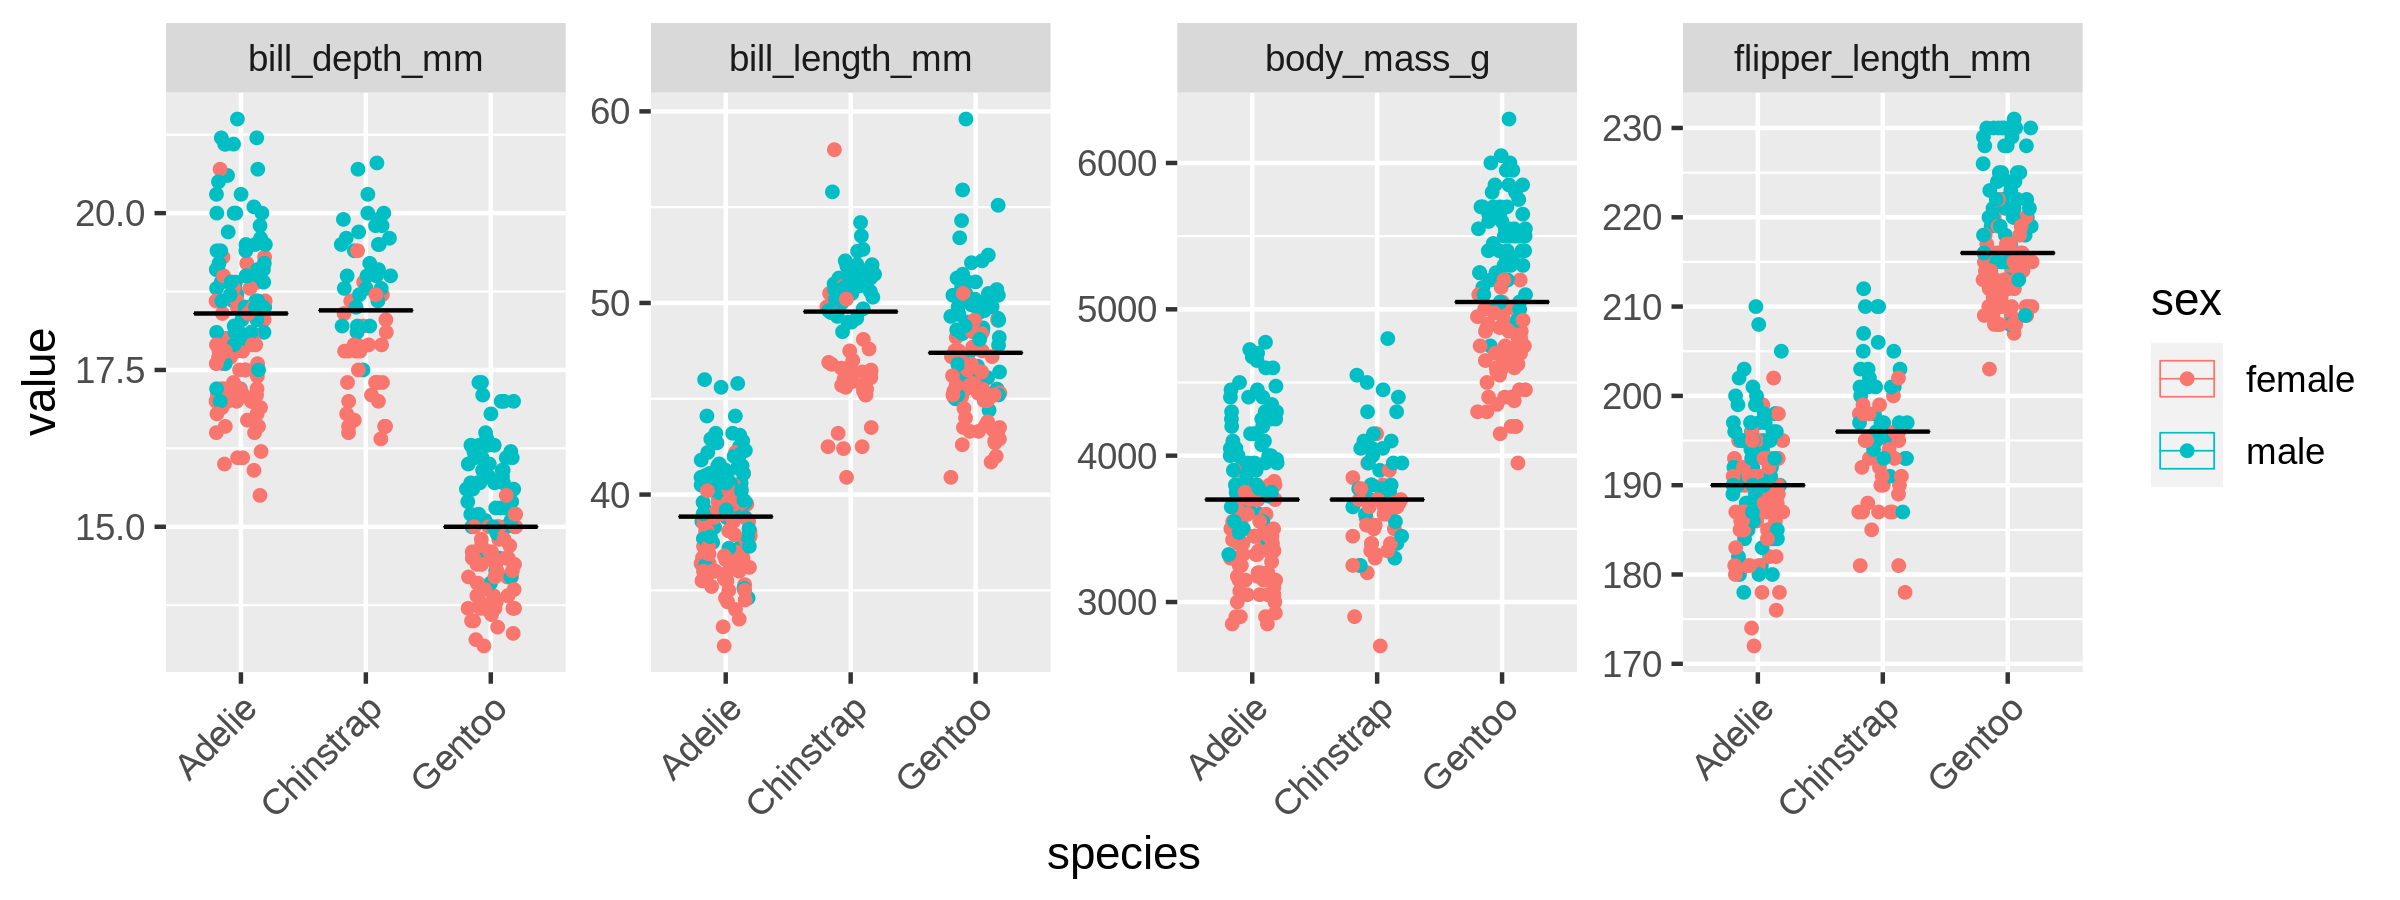

In [3]:
options(repr.plot.width = 8, repr.plot.height = 3)

p <- ggplot(penguins_long, aes(x = species, y = value, color = sex)) +
        geom_point(position = position_jitter(h = 0, w = 0.20), size = 1) +
        facet_wrap(~name, scale = "free", ncol = 4) +
        stat_summary(fun = median, 
                     fun.min = median, 
                     fun.max = median, 
                     geom = "crossbar", 
                     width = 0.75, 
                     size = 0.2,
                     mapping = aes(group = species)) +
        theme(axis.text.x = element_text(hjust = 1, angle = 45))
p